In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

filename = "../Archivos/ETH-USD.csv"
df = pd.read_csv(filename , 
                parse_dates=[ "Date" ],
                usecols=[ "Date" , "Open" , "Volume" ],
                index_col= "Date" )


df.head()
#df.describe()
df.info()
#df.shape

#df=df.reset_index()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1598 entries, 2017-11-09 to 2022-03-25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1598 non-null   float64
 1   Volume  1598 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 37.5 KB


In [2]:
min_date = datetime.datetime(year=2017, month=1, day=1)
df = df.loc[df.index > min_date]

df[ "Volume" ] /= 1e7
df= df.rolling(20).mean().dropna()
df

,Open,Volume
Date,,
2017-11-28,365.841148,111.892584
2017-11-29,374.072949,120.806034
2017-11-30,379.600149,125.891304
2017-12-01,386.931300,127.919199
2017-12-02,394.539351,124.570049
...,...,...
2022-03-21,2710.435449,1273.523235
2022-03-22,2706.700561,1274.493344
2022-03-23,2707.849976,1289.081184


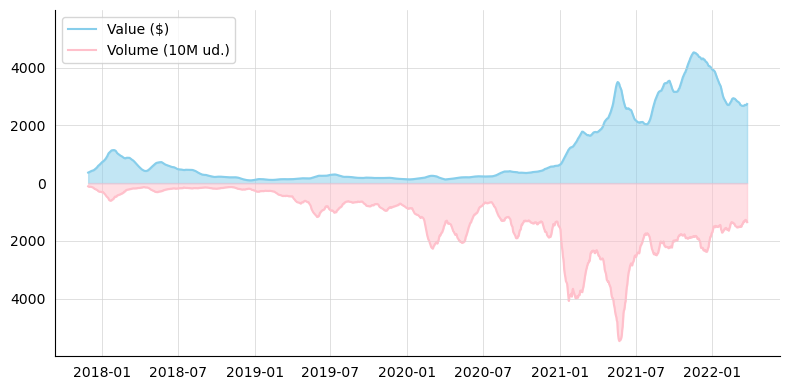

In [3]:
fig, ax = plt.subplots(figsize=(8, 4)) 
# Alias para facilitar el acceso
x = df.index
y_open = df["Open"]
y_vol = df["Volume"]
# Líneas de evolución
ax.plot(x, y_open, label= "Value ($)" , color= "skyblue" , linewidth=1.5)
ax.plot(x, -y_vol, label= "Volume (10M ud.)" , color= "pink" , linewidth=1.5)
# Relleno del área
plt.fill_between(x, y_open, alpha=0.5, color= "skyblue" , zorder=3)
plt.fill_between(x, -y_vol, alpha=0.5, color= "pink" , zorder=3)
# Formateo de los ejes
ax.xaxis.set_ticks_position( "none" )
ax.yaxis.set_ticks_position( "none" )
y_ticks = [-4000, -2000, 0, 2000, 4000]
y_tick_labels = [ 4000 , 2000 , 0 , 2000 , 4000 ]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-6000, 6000)
# Rejilla
ax.xaxis.grid(color= "lightgray" , linewidth=.5)
for y_tick in y_ticks:
  if y_tick != 0:
    ax.axhline(y_tick, color= "lightgray" , linewidth=.5)
ax.legend()

ax.spines["right"].set_visible(False) # ocultar borde derecho
ax.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout()